<a href="https://colab.research.google.com/github/AlexFrost071/for-hana/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Uploading the data from Local File System

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [15]:
filename = 'pokemon.csv'

In [18]:
import pandas as pd

filename = 'Pokemon.csv'
data = pd.read_csv(filename, encoding='utf-8-sig')

peek = data.head(20)
print(peek)


     #                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0    1                  Bulbasaur  Grass  Poison    318  45      49       49   
1    2                    Ivysaur  Grass  Poison    405  60      62       63   
2    3                   Venusaur  Grass  Poison    525  80      82       83   
3    3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4    4                 Charmander   Fire     NaN    309  39      52       43   
5    5                 Charmeleon   Fire     NaN    405  58      64       58   
6    6                  Charizard   Fire  Flying    534  78      84       78   
7    6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8    6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9    7                   Squirtle  Water     NaN    314  44      48       65   
10   8                  Wartortle  Water     NaN    405  59      63       80   
11   9                  Blastoise  Water

In [19]:
print(data.shape)

(800, 13)


In [25]:
print(data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [26]:
type_counts = data.groupby('Type 1').size()
print("Counts by Primary Type:\n", type_counts)

Counts by Primary Type:
 Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64


In [27]:
print(data.describe())

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

In [30]:
# Select only the numerical columns from your DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlations = numeric_data.corr(method='pearson')

# Print the correlation matrix
print(correlations)

                   #     Total        HP    Attack   Defense   Sp. Atk  \
#           1.000000  0.119813  0.097614  0.102298  0.094786  0.088759   
Total       0.119813  1.000000  0.618748  0.736211  0.612787  0.747250   
HP          0.097614  0.618748  1.000000  0.422386  0.239622  0.362380   
Attack      0.102298  0.736211  0.422386  1.000000  0.438687  0.396362   
Defense     0.094786  0.612787  0.239622  0.438687  1.000000  0.223549   
Sp. Atk     0.088759  0.747250  0.362380  0.396362  0.223549  1.000000   
Sp. Def     0.085817  0.717609  0.378718  0.263990  0.510747  0.506121   
Speed       0.010733  0.575943  0.175952  0.381240  0.015227  0.473018   
Generation  0.982516  0.048384  0.058683  0.051451  0.042419  0.036437   

             Sp. Def     Speed  Generation  
#           0.085817  0.010733    0.982516  
Total       0.717609  0.575943    0.048384  
HP          0.378718  0.175952    0.058683  
Attack      0.263990  0.381240    0.051451  
Defense     0.510747  0.015227    

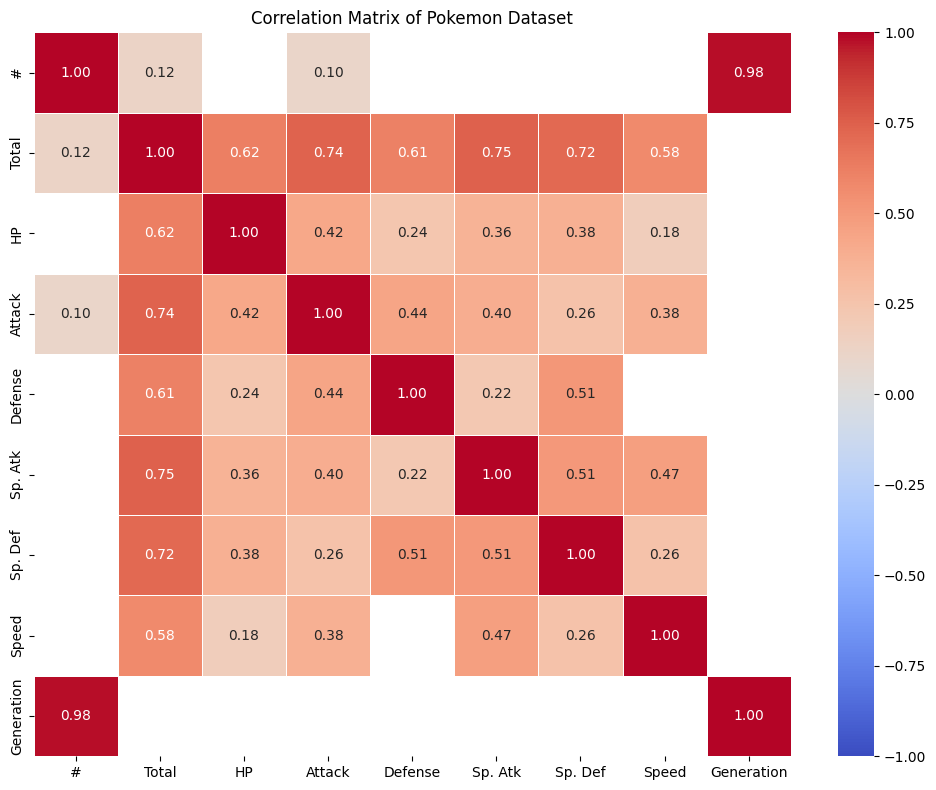

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess your Pokemon data
data = pd.read_csv('Pokemon.csv', encoding='utf-8')
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlations
correlations = numeric_data.corr(method='pearson')

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f",
    mask=abs(correlations) < 0.1,  # Adjust threshold to show more/fewer values
    vmin=-1, vmax=1  # Ensure color scale is consistent
)
plt.title('Correlation Matrix of Pokemon Dataset')
plt.tight_layout()
plt.show()

Skewness of numeric columns:
#            -0.001123
Total         0.152530
HP            1.568224
Attack        0.551614
Defense       1.155912
Sp. Atk       0.744662
Sp. Def       0.854019
Speed         0.357933
Generation    0.014258
dtype: float64


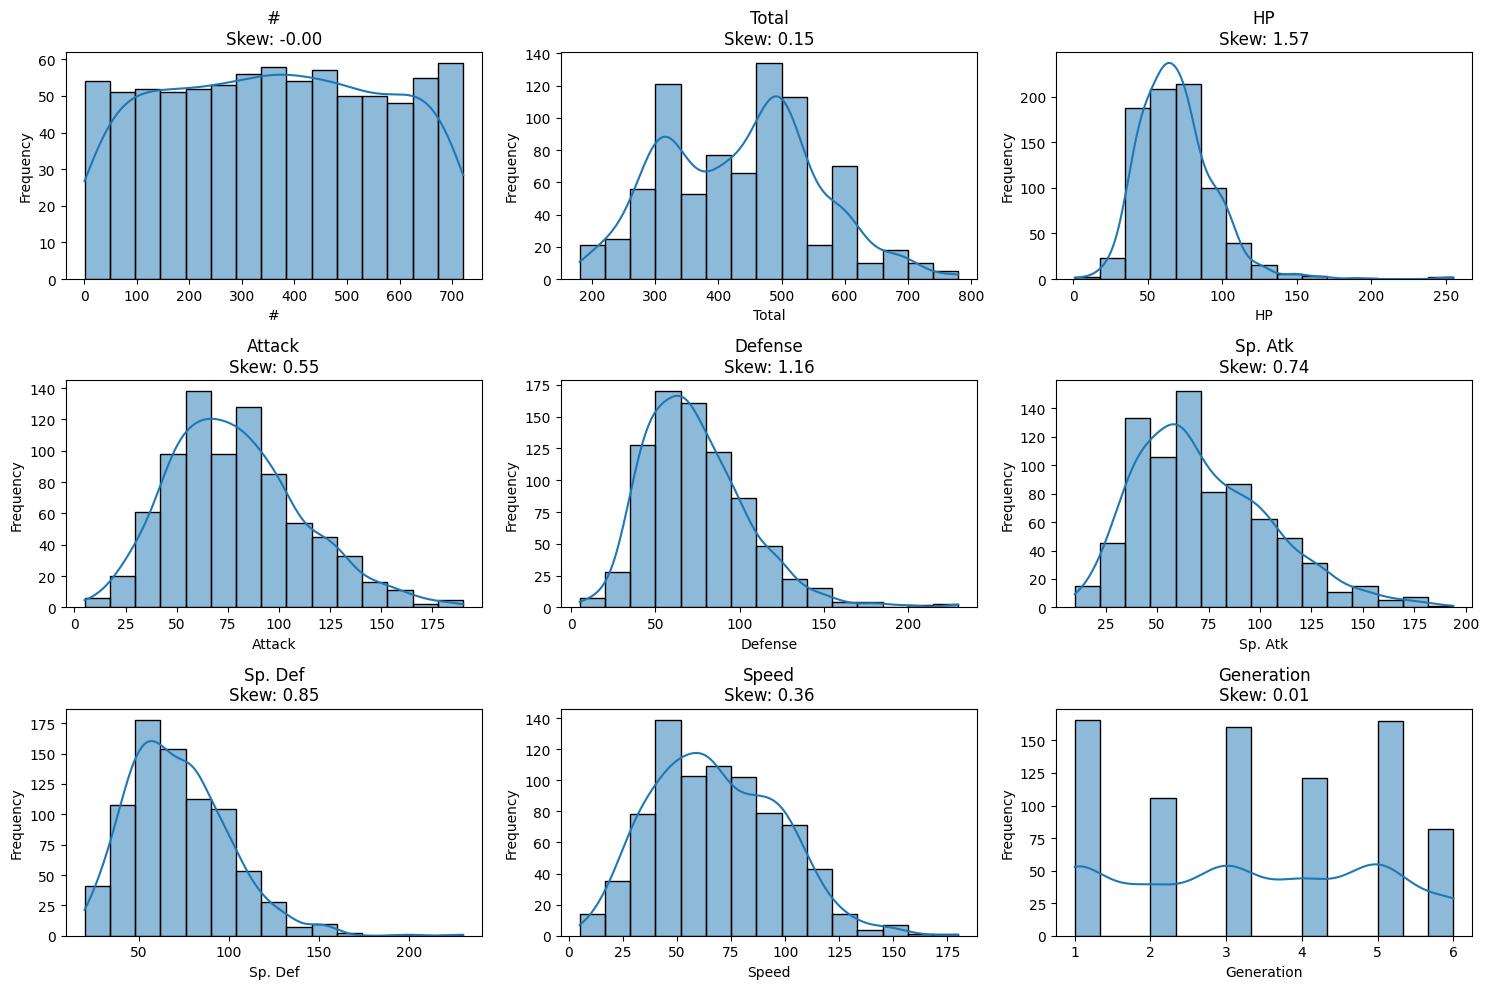

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and select numeric columns from your Pokemon data
data = pd.read_csv('Pokemon.csv', encoding='utf-8')
numeric_data = data.select_dtypes(include=['number'])

# Print skewness of numeric columns
print("Skewness of numeric columns:")
print(numeric_data.skew())

# Create distribution plots with skewness
plt.figure(figsize=(15, 10))  # Adjust figure size for better readability

num_cols = len(numeric_data.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
cols = min(num_cols, 3)      # Up to 3 columns per row

for i, column in enumerate(numeric_data.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(numeric_data[column], kde=True, bins=15)
    skewness = numeric_data[column].skew()
    plt.title(f'{column}\nSkew: {skewness:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()